In [1]:
%load_ext autoreload
%autoreload 2


Dataset Overview:
Number of experiments: 196

Feature statistics:
       circuit_depth  circuit_size  circuit_width  payload_size  success_rate
count     196.000000    196.000000     196.000000    196.000000    195.000000
mean     2966.122449   5710.642857       8.163265      2.581633      0.242763
std      4001.380034   6096.816724       2.369437      1.184719      0.179828
min        93.000000    411.000000       5.000000      1.000000      0.019775
25%       511.000000   1031.750000       7.000000      2.000000      0.078613
50%      1510.000000   3033.000000       9.000000      3.000000      0.197021
75%      3345.000000   6034.500000      11.000000      4.000000      0.400146
max     20015.000000  20036.000000      13.000000      5.000000      0.733398

Correlation matrix:
               circuit_depth  circuit_size  circuit_width  payload_size  \
circuit_depth       1.000000      0.794495      -0.412021     -0.412021   
circuit_size        0.794495      1.000000      -0.058447   

/tmp/ipykernel_946/2289351186.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Running regression analysis...

Model 1: All features (linear)
                            OLS Regression Results                            
Dep. Variable:           success_rate   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     440.4
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           1.60e-85
Time:                        11:13:06   Log-Likelihood:                 260.10
No. Observations:                 195   AIC:                            -512.2
Df Residuals:                     191   BIC:                            -499.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

/opt/conda/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



=== Model Comparison ===
                             Model  R-squared  Adj R-squared         AIC  \
0   Model 1: All features (linear)   0.873684       0.871700 -512.209248   
1  Model 2: Log-transformed target   0.954109       0.953388 -105.543189   
2  Model 3: With interaction terms   0.928362       0.926076 -616.805159   
3    Model 4: With quadratic terms   0.929705       0.927462 -620.496892   
4       Model 5: Feature selection   0.873684       0.871700 -512.209248   

          BIC  BP Test p-value  White Test p-value  JB Test p-value  
0 -499.117250     1.908185e-03            0.000003     4.577057e-33  
1  -92.451191     6.131352e-03            0.009629     1.998488e-11  
2 -593.894162     4.002761e-04            0.000644    3.053183e-152  
3 -597.585895     4.275474e-07                 NaN     1.673370e-98  
4 -499.117250     1.908185e-03            0.000003     4.577057e-33  

Models ranked by Adjusted R-squared:
                             Model  Adj R-squared
1  Model 

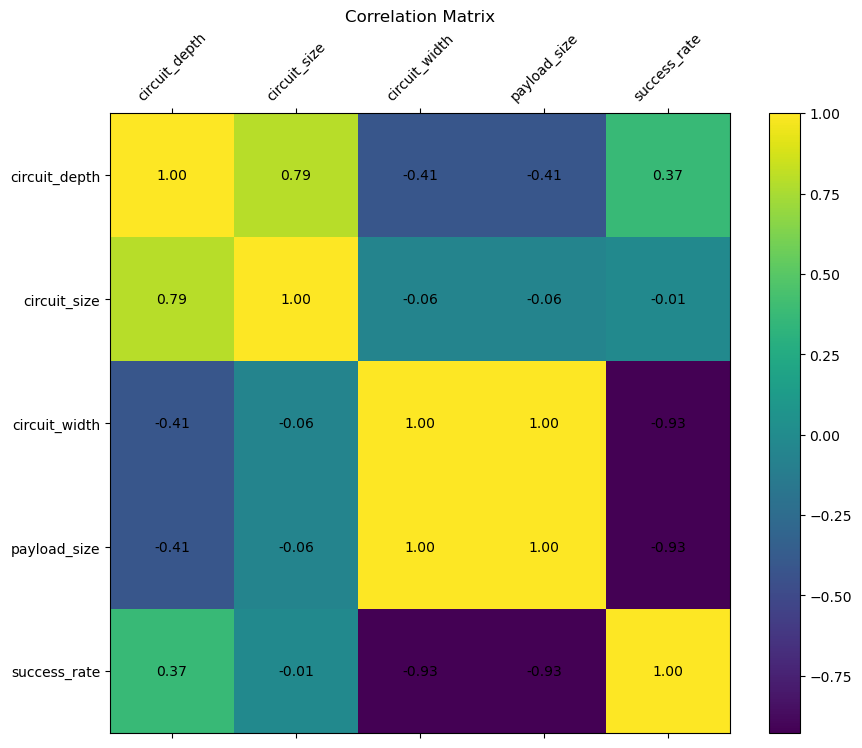

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from results.experiment_analysis import create_experiment_dataframe, analyze_regression_models

# Create dataframe from CSV file
csv_file = 'consolidated_experiment_results.csv'
df = create_experiment_dataframe(csv_file)

# Print basic statistics
print("\nDataset Overview:")
print(f"Number of experiments: {len(df)}")
print("\nFeature statistics:")
print(df[['circuit_depth', 'circuit_size', 'circuit_width', 'payload_size', 'success_rate']].describe())

# Check correlations
print("\nCorrelation matrix:")
corr_matrix = df[['circuit_depth', 'circuit_size', 'circuit_width', 'payload_size', 'success_rate']].corr()
print(corr_matrix)

# Plot correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(i, j, f"{corr_matrix.iloc[i, j]:.2f}", ha='center', va='center')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

# Run regression analysis
print("\nRunning regression analysis...")
model_results = analyze_regression_models(df)

# Additional analysis: Examine the effect of payload size
print("\nAnalyzing effect of payload size...")
for payload_size in sorted(df['payload_size'].unique()):
    subset = df[df['payload_size'] == payload_size]
    print(f"\nPayload size {payload_size} (n={len(subset)}):")
    
    # Calculate average success rate
    avg_success = subset['success_rate'].mean()
    print(f"Average success rate: {avg_success:.4f}")
    
    # Calculate correlation with circuit parameters for this payload size
    corr = subset[['circuit_depth', 'circuit_size', 'circuit_width', 'success_rate']].corr()
    print("Correlations with success_rate:")
    for col in ['circuit_depth', 'circuit_size', 'circuit_width']:
        print(f"  {col}: {corr.loc[col, 'success_rate']:.4f}")

print("\nRegression analysis completed.")

## Summary

| Model | R-squared | Adj R-squared | AIC | BIC | Heteroscedasticity |
|-------|-----------|---------------|-----|-----|-------------------|
| Model 2: Log-transformed target | 0.954 | 0.953 | -105.54 | -92.45 | Present |
| Model 6: Weighted Least Squares | 0.966 | 0.965 | -489.18 | -476.08 | Present |
| Model 4: Quadratic terms | 0.930 | 0.927 | -620.50 | -597.59 | Present |
| Model 3: Interaction terms | 0.928 | 0.926 | -616.81 | -593.89 | Present |
| Model 1: Linear | 0.874 | 0.872 | -512.21 | -499.12 | Present |

* All models show evidence of heteroscedasticity (non-constant variance in residuals), indicating that the models' prediction accuracy varies across different values of the predictors.
* Model 6 (Weighted Least Squares) has the highest R-squared (0.966) and adjusted R-squared (0.965), suggesting it explains the most variance in success rates.
* Model 2 (Log-transformed target) also performs very well with an R-squared of 0.954, and was identified as the recommended model with robust standard errors to address heteroscedasticity.
* Multicollinearity issues were detected in Model 4 (quadratic terms), with high VIF values for all predictors, indicating that some predictors are highly correlated.
* Payload size has the strongest effect on success rates across all models, with a strong negative relationship (larger payload size = lower success rate).
* Circuit width is perfectly correlated with payload size (correlation = 1.0), suggesting they provide redundant information in the models.

## The analysis by payload size shows:

* Payload size 1: Average success rate = 0.5101
* Payload size 2: Average success rate = 0.2896
* Payload size 3: Average success rate = 0.1340
* Payload size 4: Average success rate = 0.0648
* Payload size 5: Average success rate = 0.0323

This confirms a clear negative relationship between payload size and success rate, with success rates decreasing substantially as payload size increases.


## Interpretation of Effects

* Payload size: The most influential factor, with each additional qubit reducing success rate by approximately 0.30-0.56 (depending on the model).
* Circuit width: Positively associated with success rate in most models, but this effect is confounded with payload size due to perfect correlation.
* Circuit depth: Has a small positive effect on success rate in most models (except Model 2), with each additional unit of depth increasing success rate by approximately 1.2e-05.
* Circuit size: Has a small negative effect on success rate, with each additional unit of size decreasing success rate by approximately 6.3e-06 to 9.0e-06.

## Conclusion

The success rate of quantum circuits is most strongly influenced by payload size, with larger payloads resulting in significantly lower success rates. The Weighted Least Squares model provides the best fit for predicting success rates based on circuit parameters, accounting for the heteroscedasticity present in the data. For practical applications, I recommend using this model with caution regarding the multicollinearity between circuit width and payload size.

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.graphics.gofplots import ProbPlot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from results import create_experiment_dataframe
from results import analyze_and_visualize_models, load_data

Loading data from: consolidated_experiment_results.csv
Fitting Model 2: Log-transformed target with robust standard errors...
Fitting Model 6: Weighted Least Squares...

Model 2: Log-transformed target with robust standard errors
                            OLS Regression Results                            
Dep. Variable:           success_rate   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     8153.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          3.56e-212
Time:                        11:49:05   Log-Likelihood:                 56.772
No. Observations:                 195   AIC:                            -105.5
Df Residuals:                     191   BIC:                            -92.45
Df Model:                           3                                         
Covariance Type:                  HC3                      

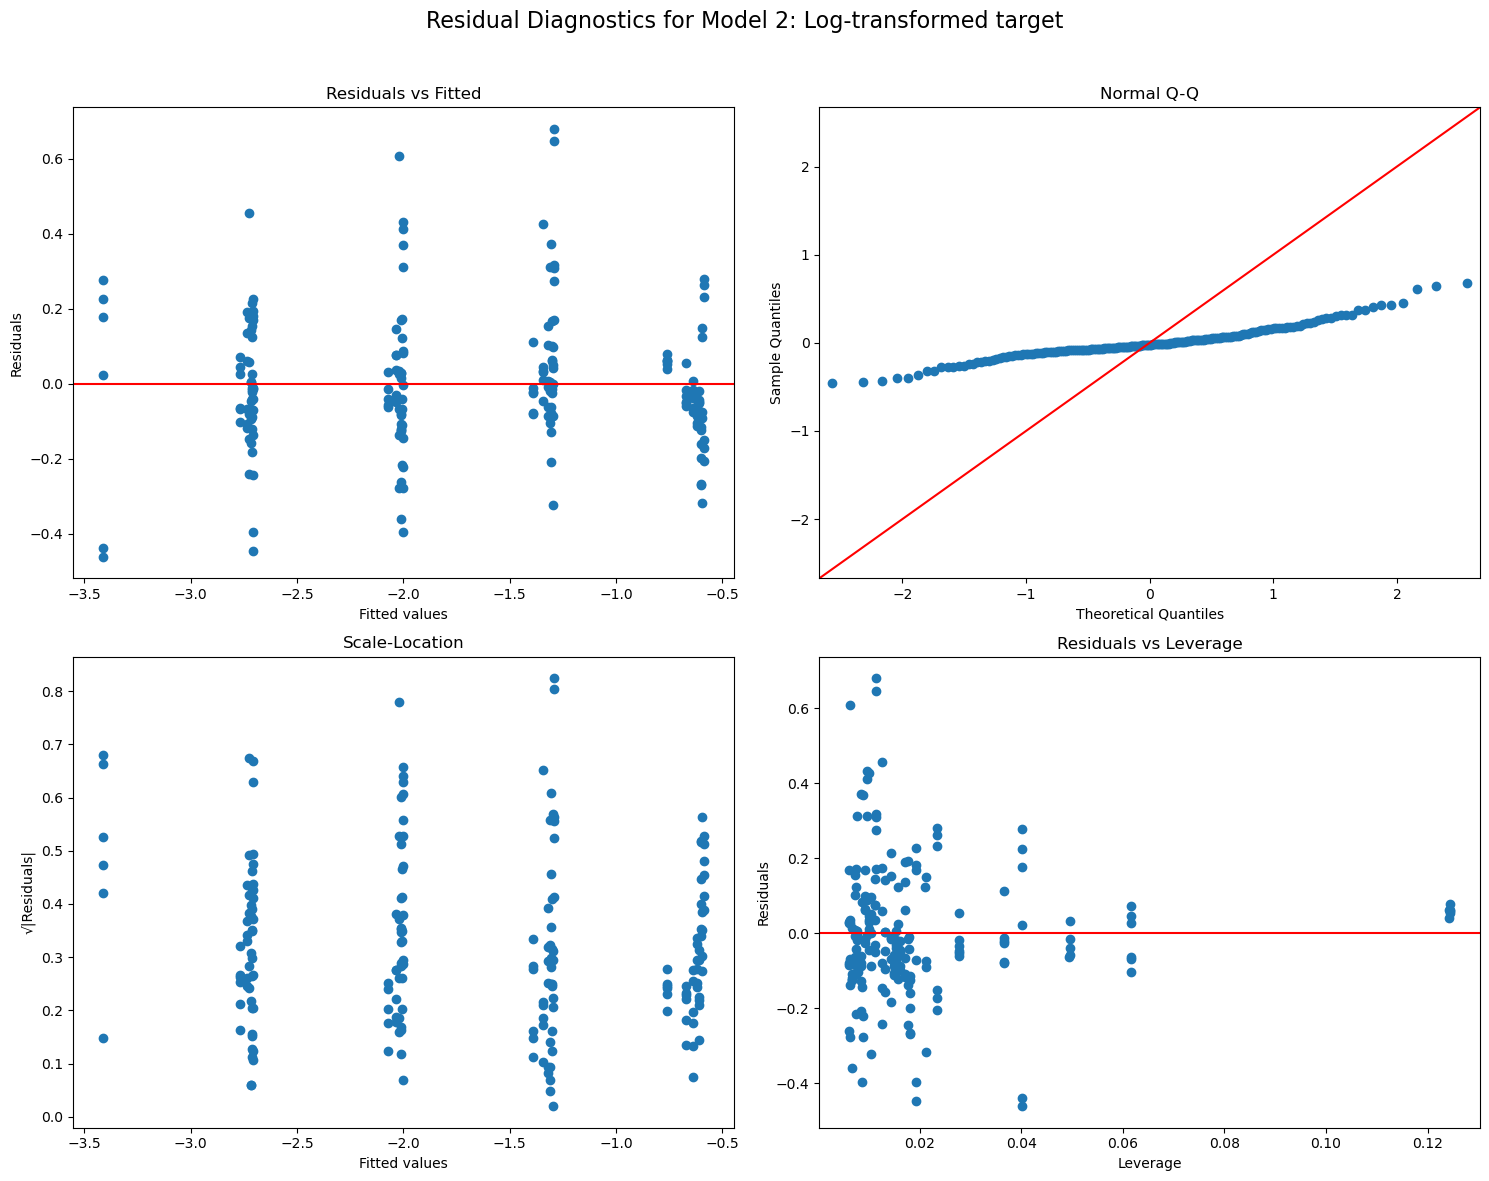

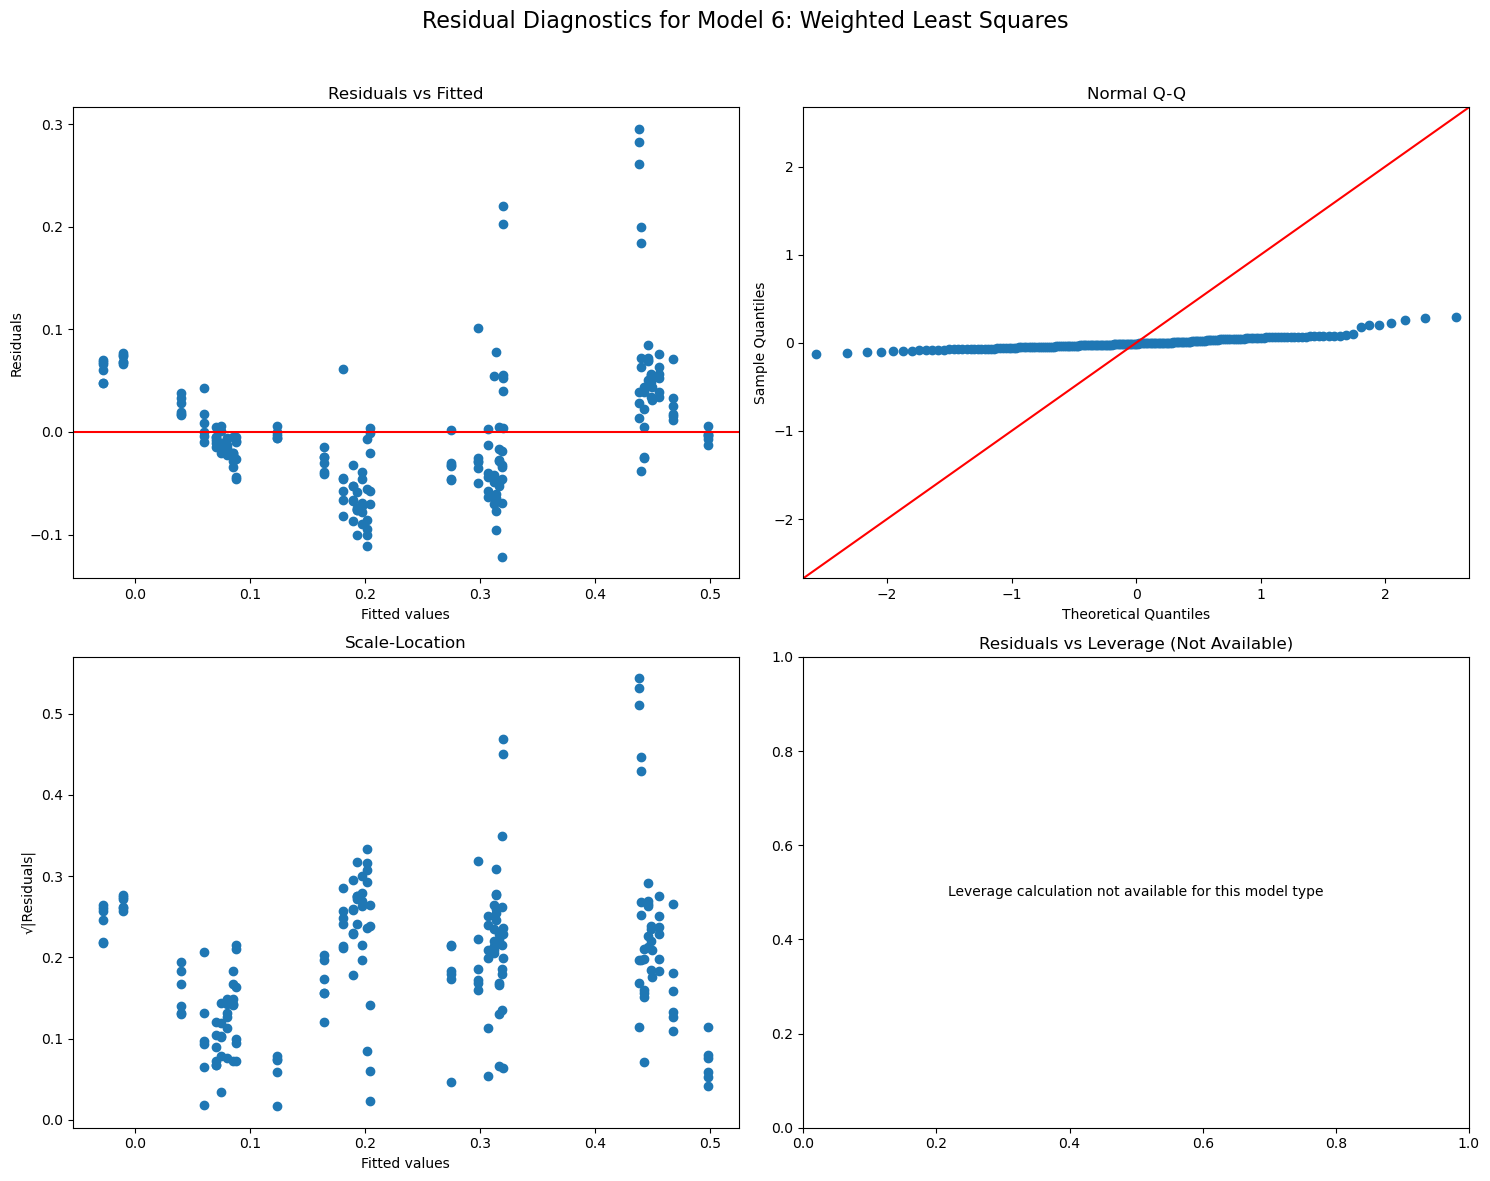

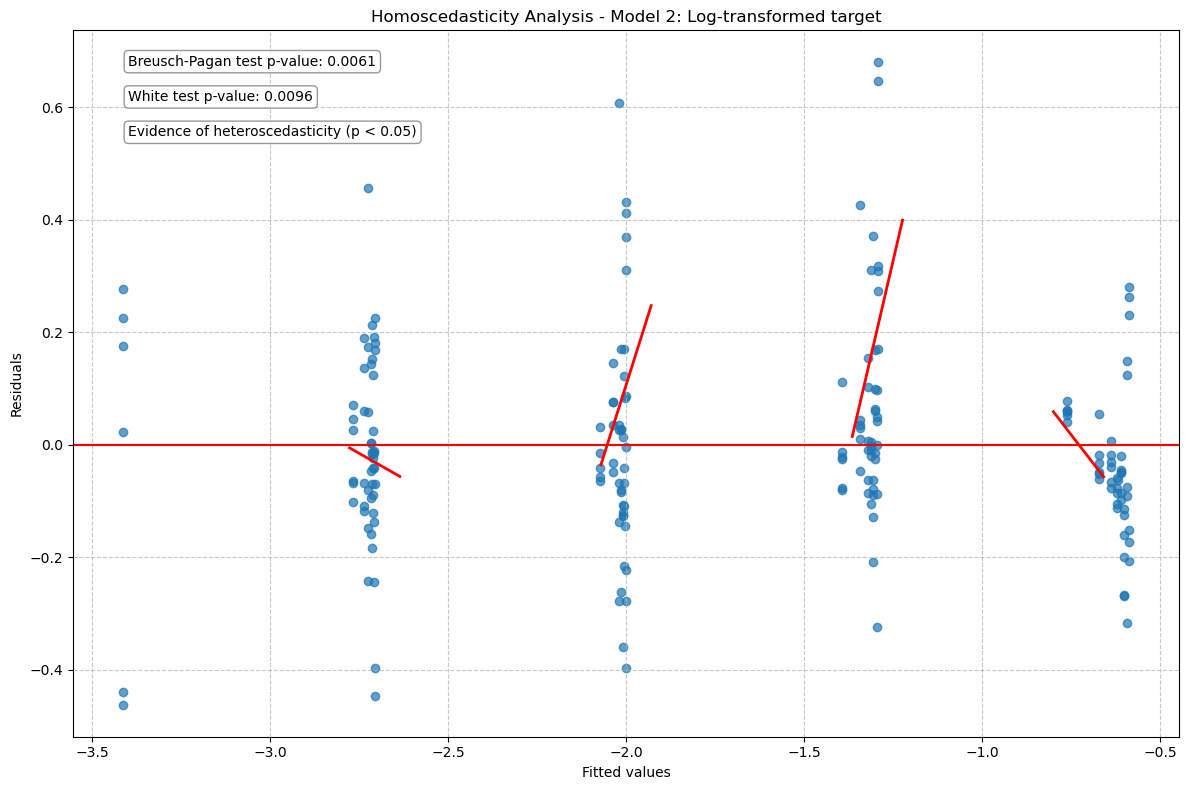

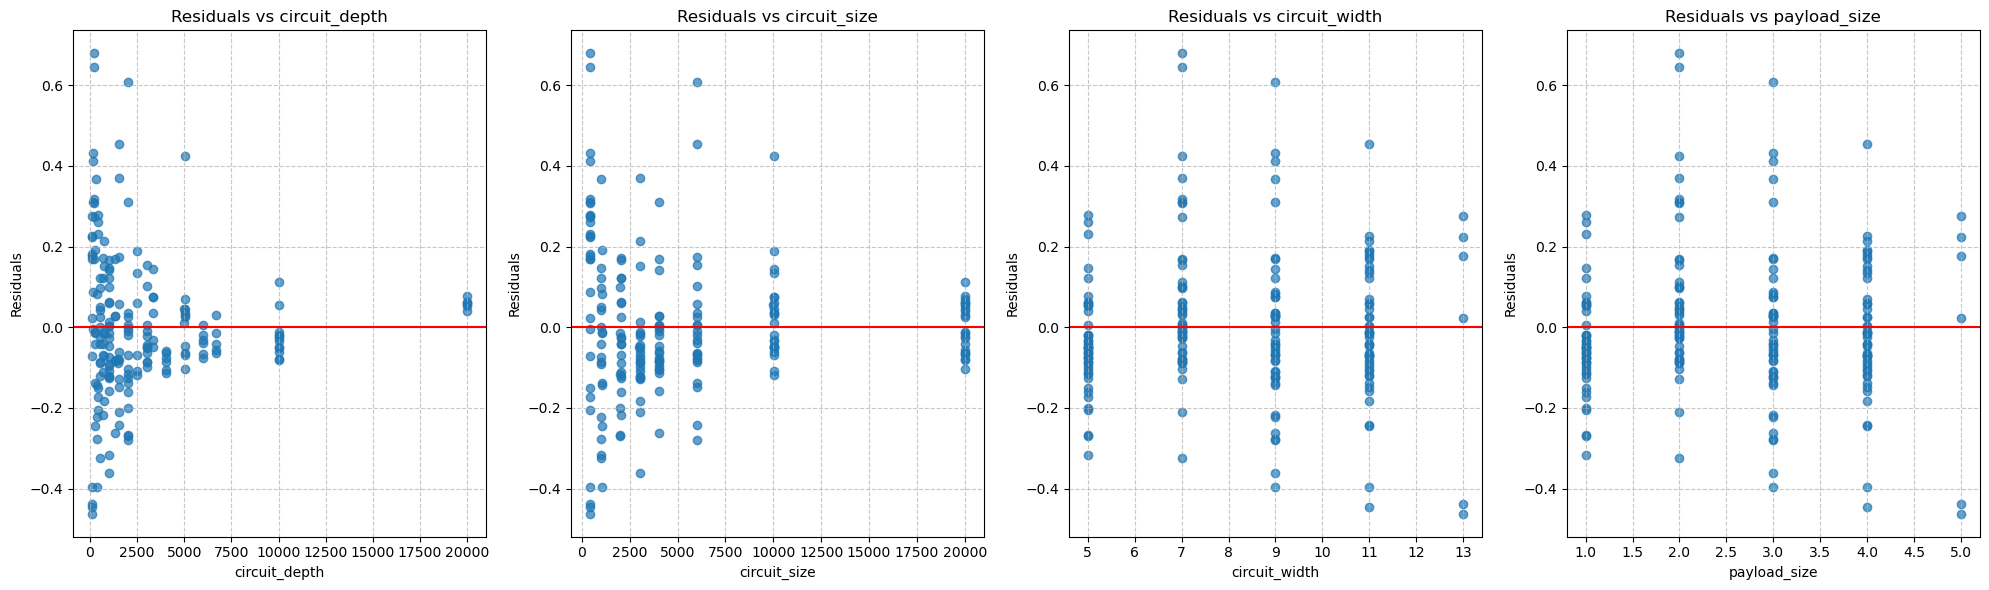

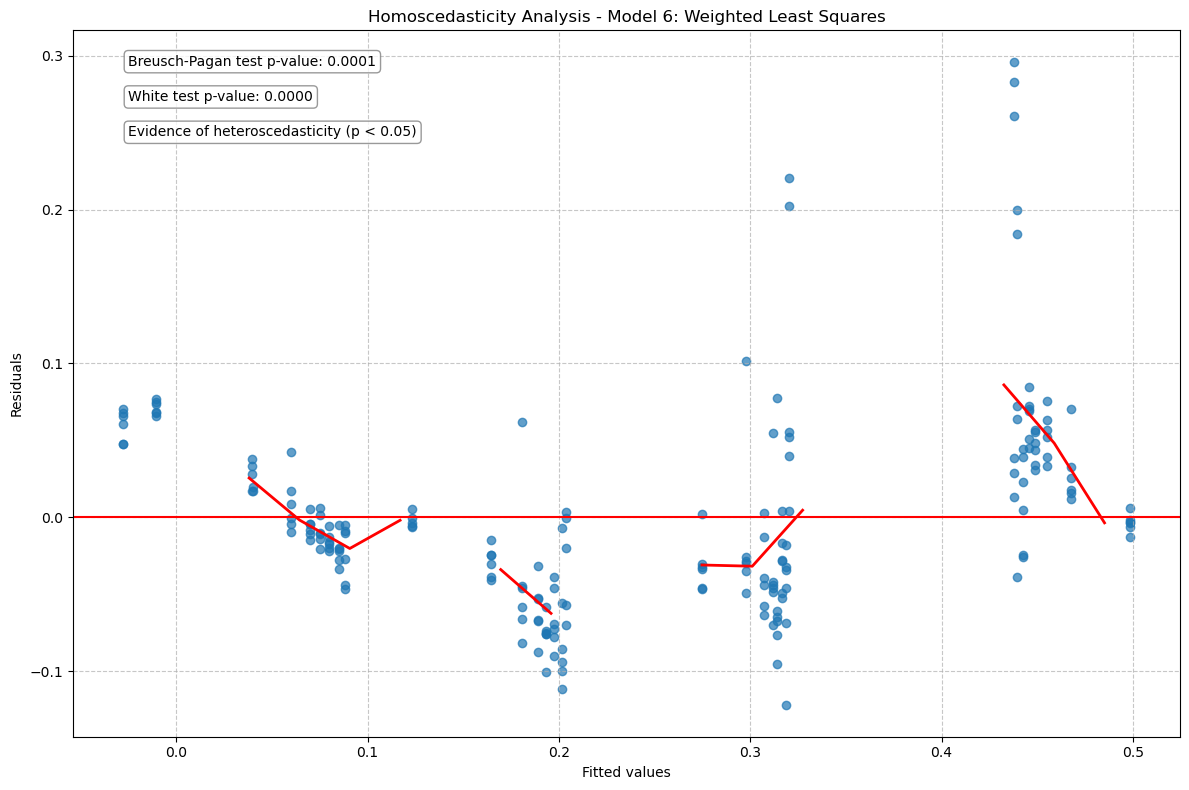

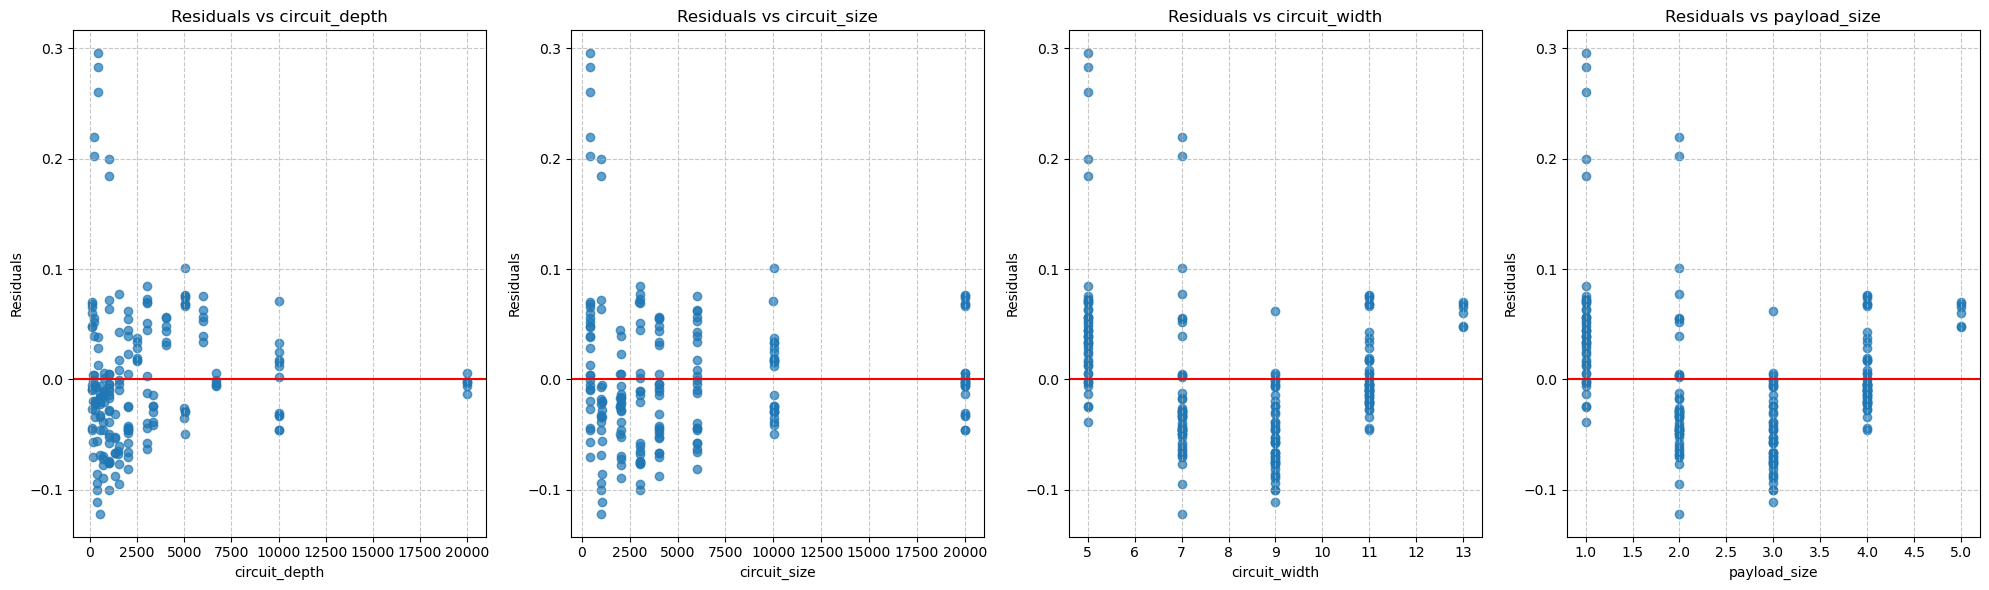

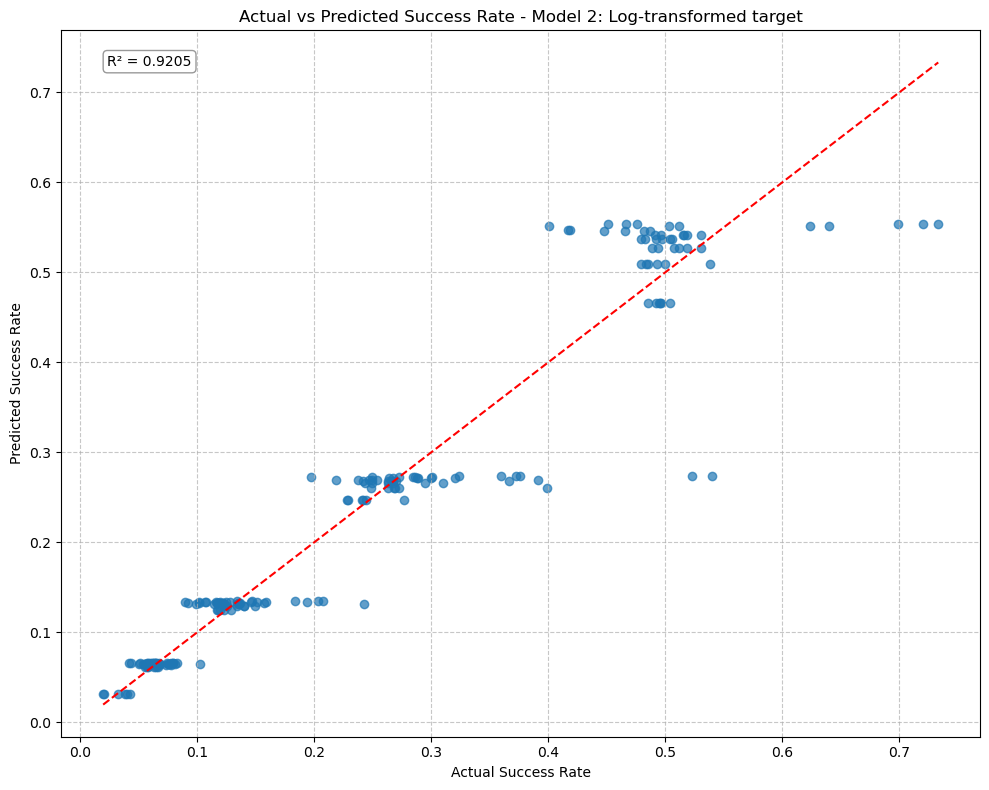

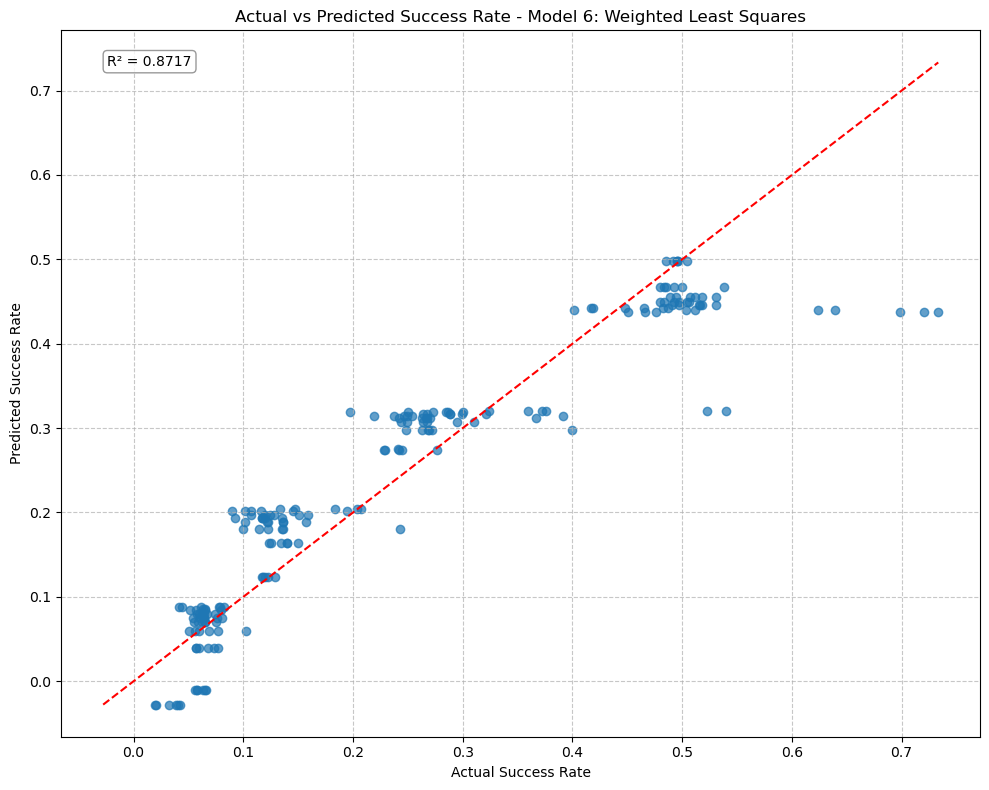

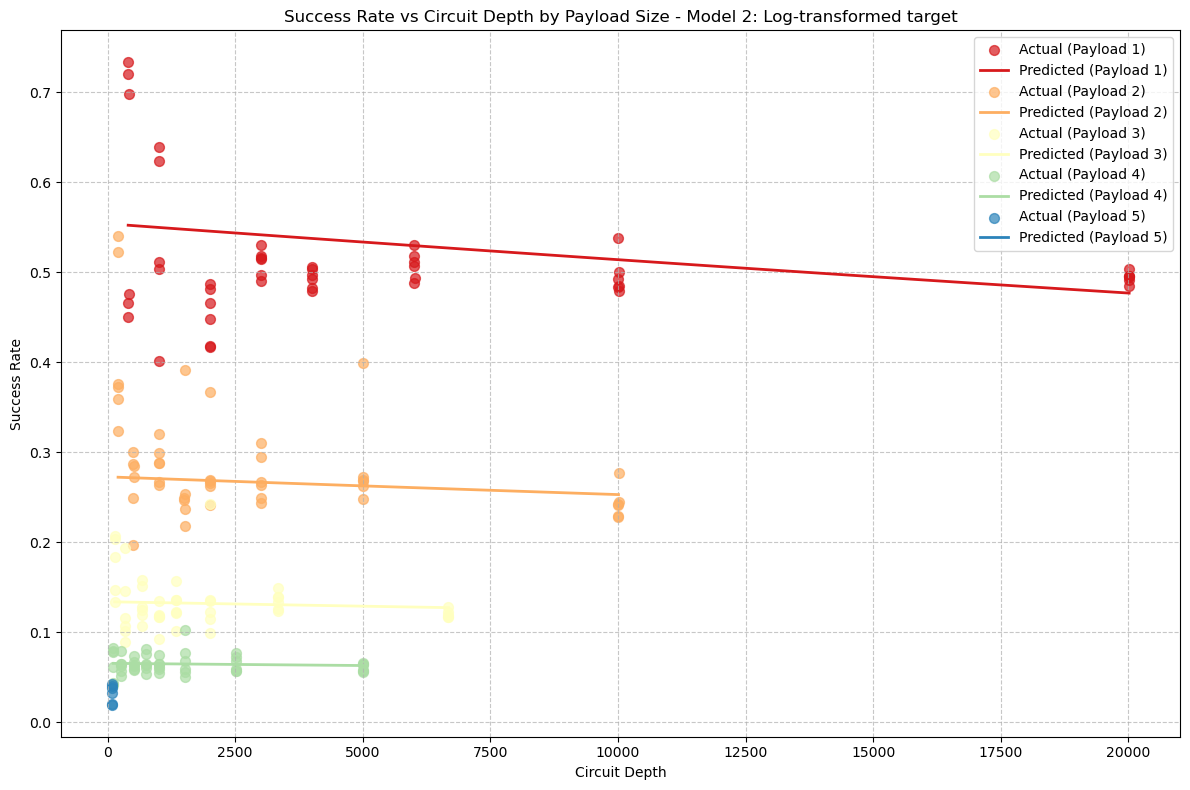

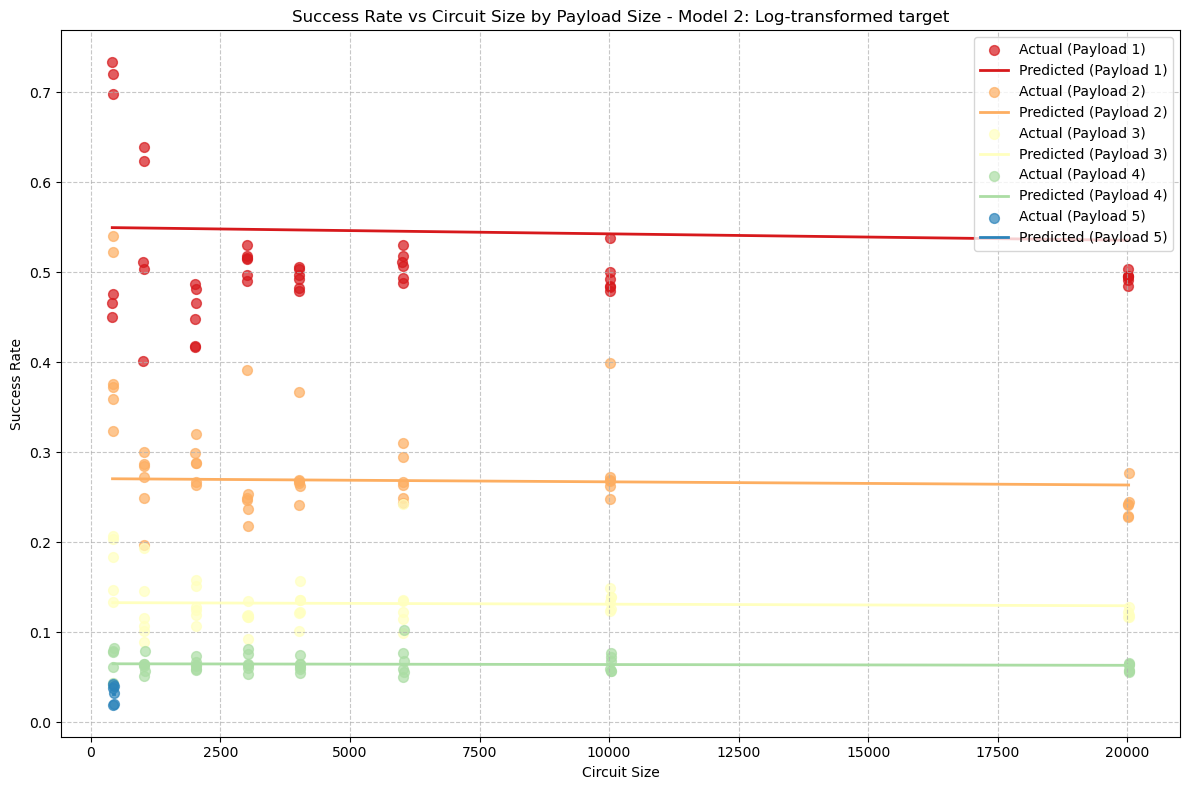

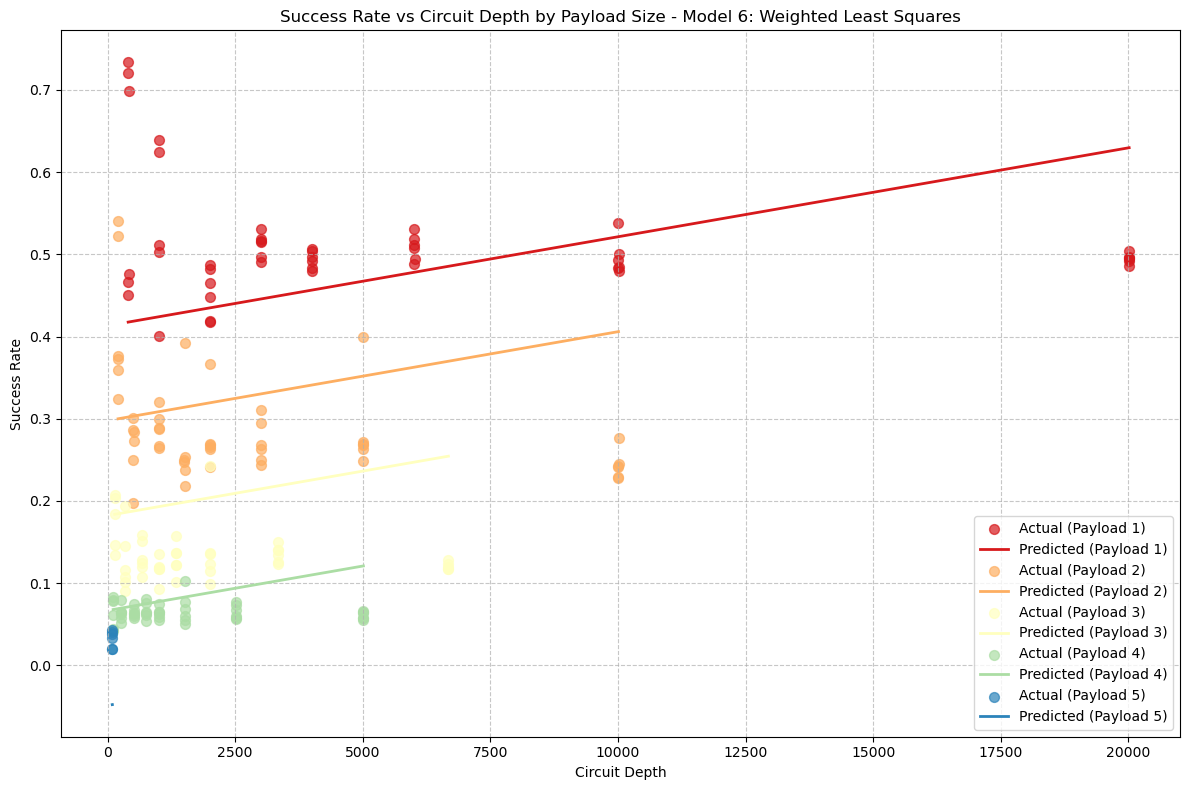

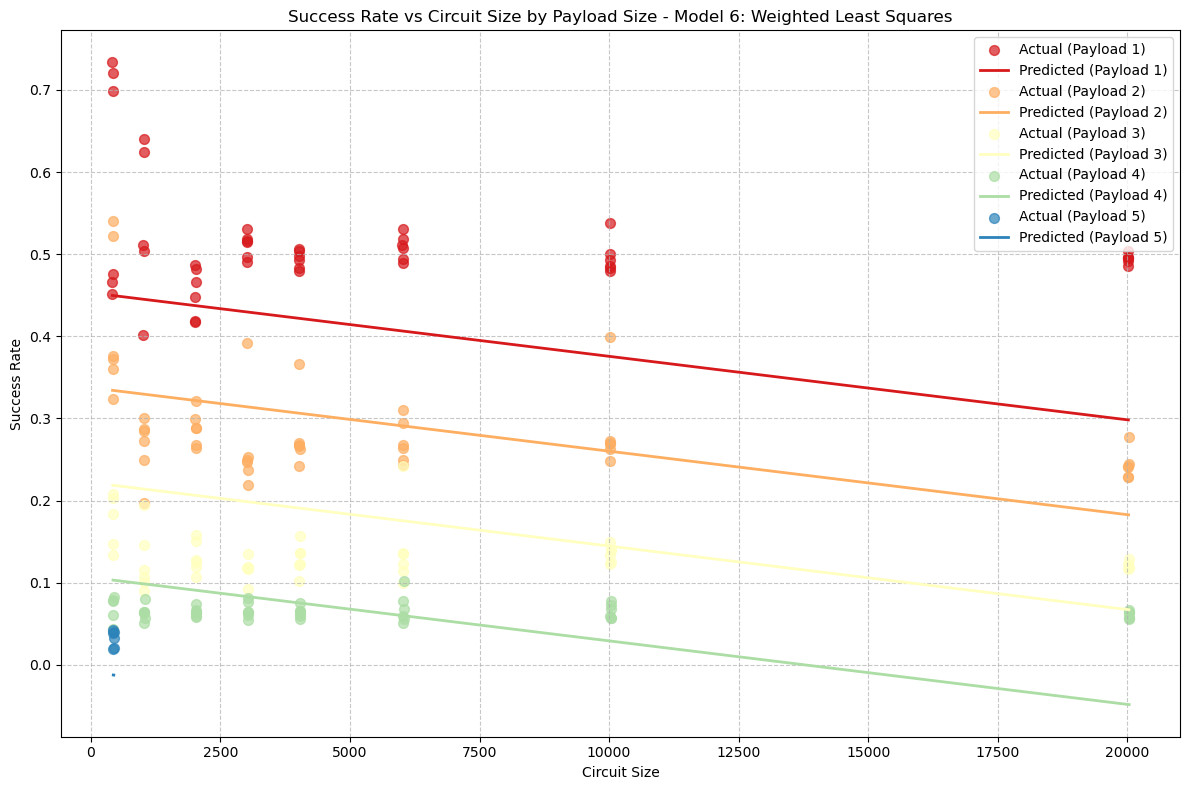

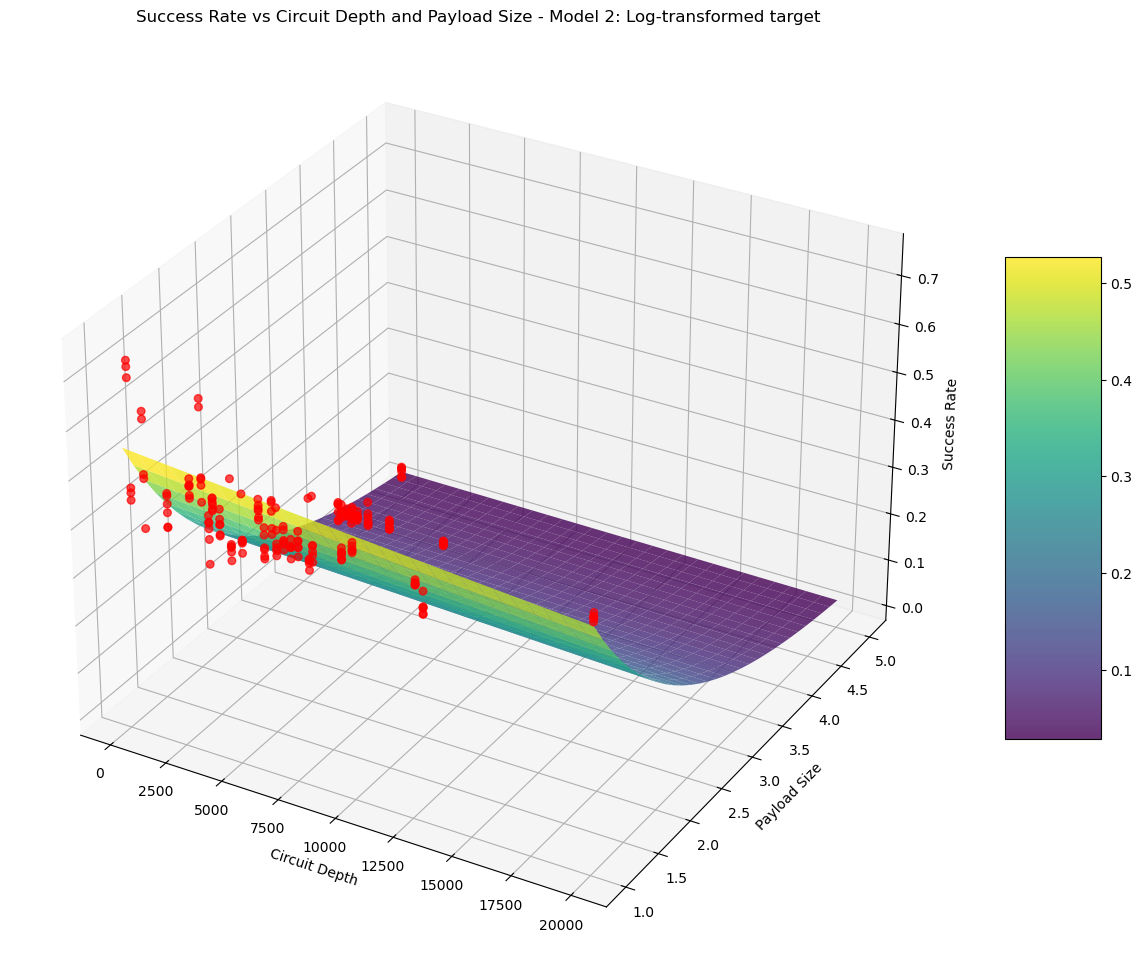

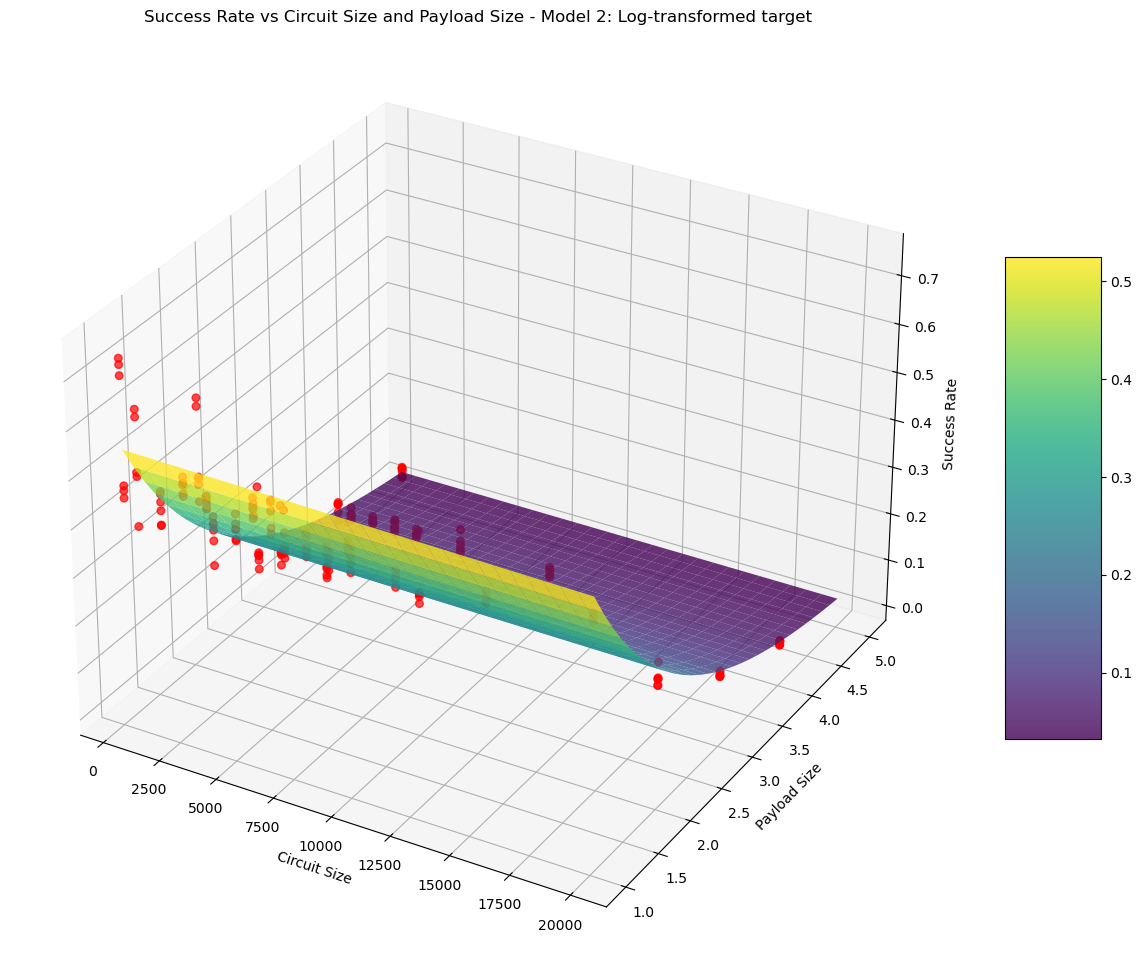

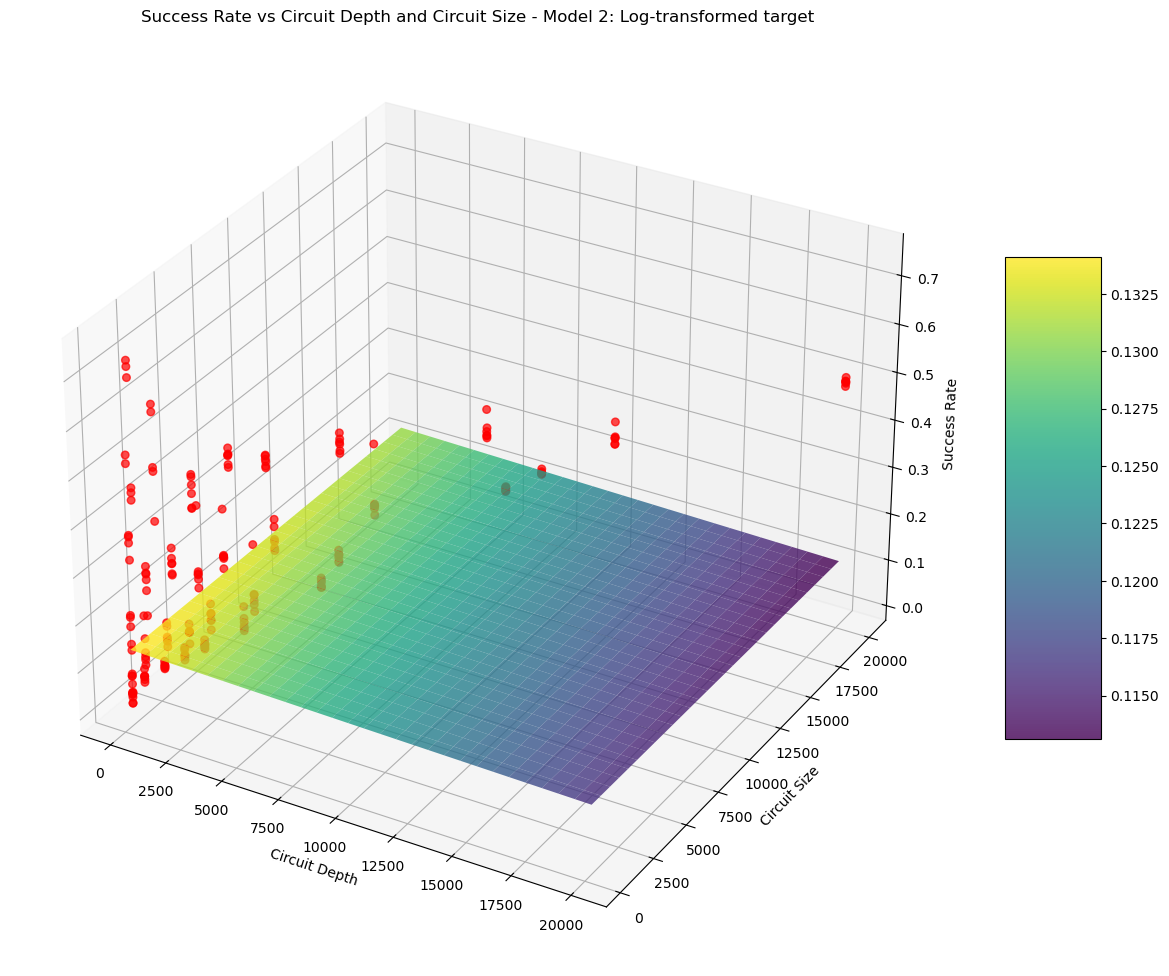

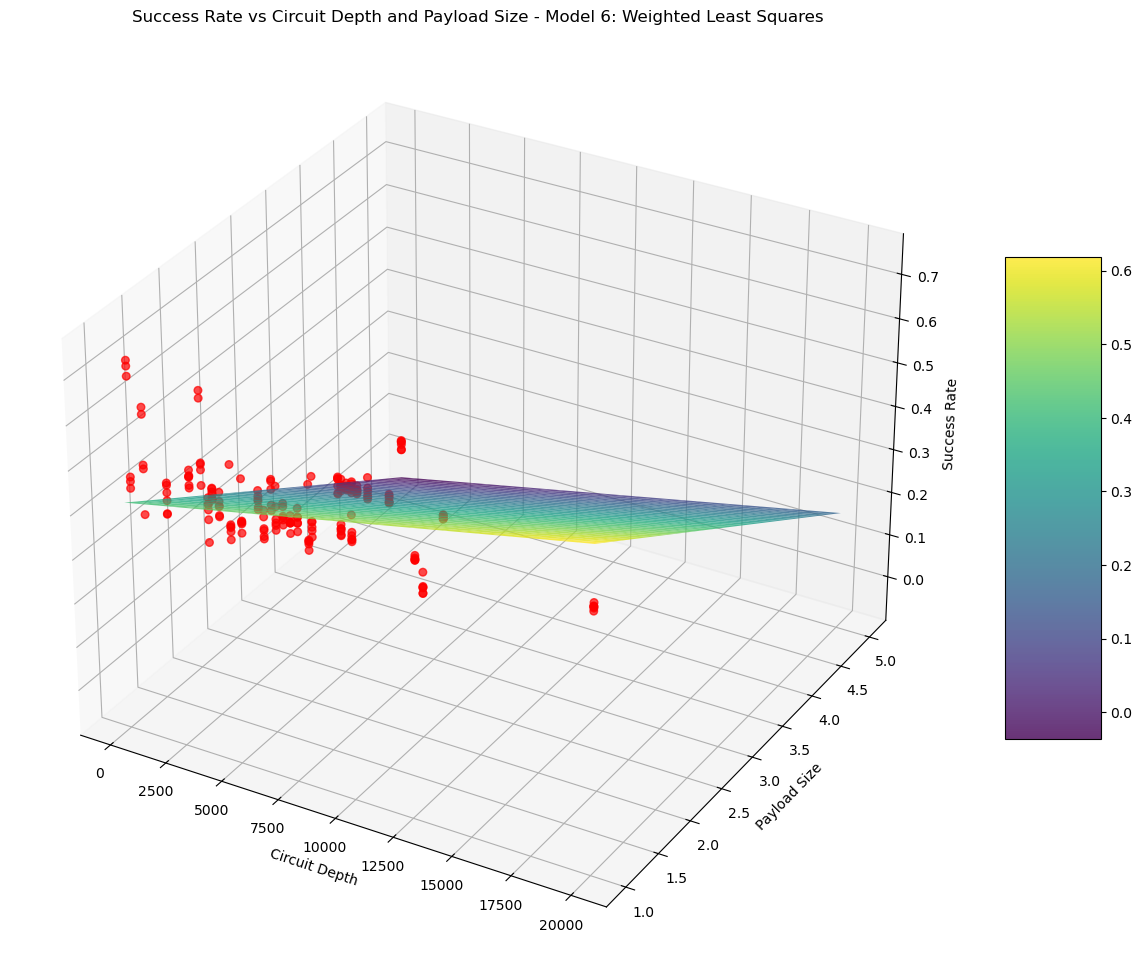

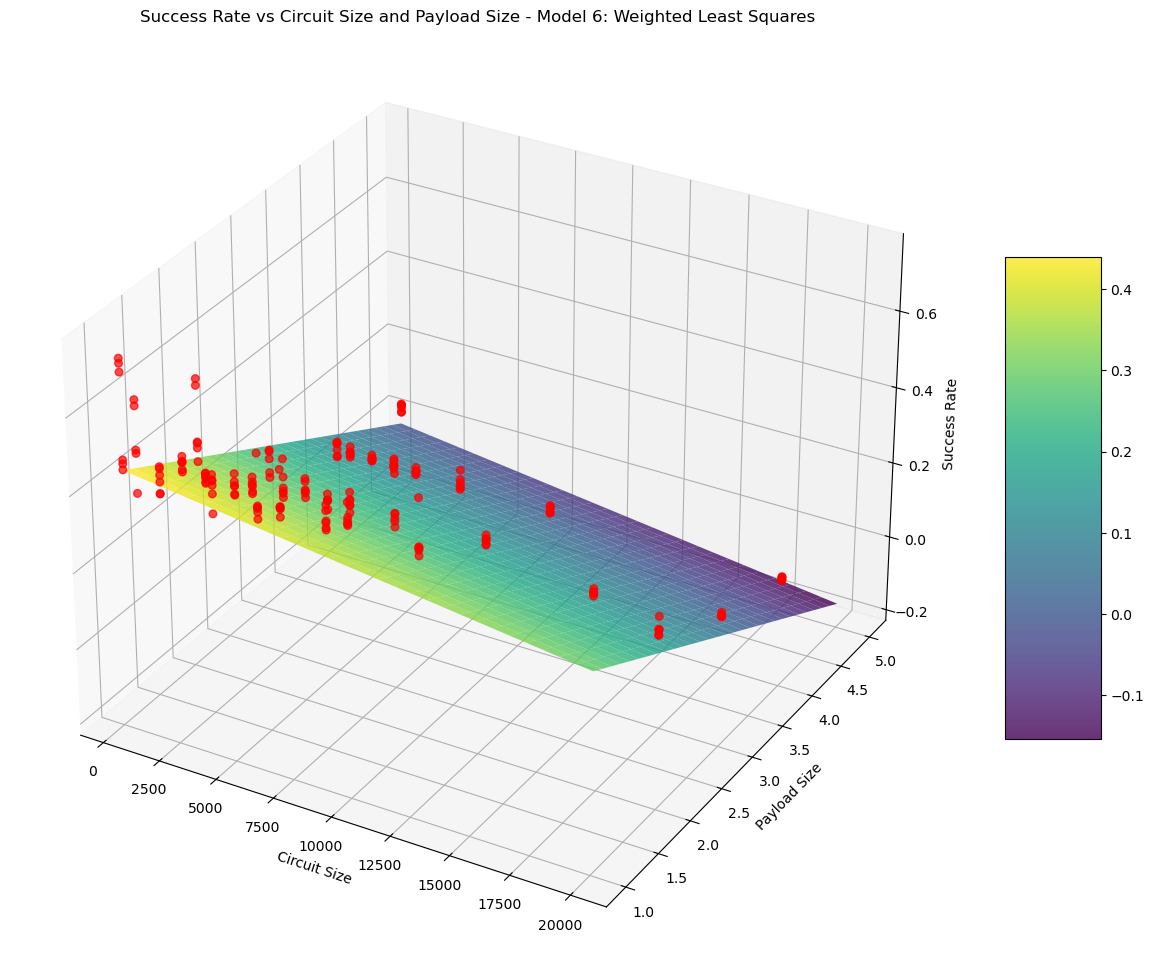

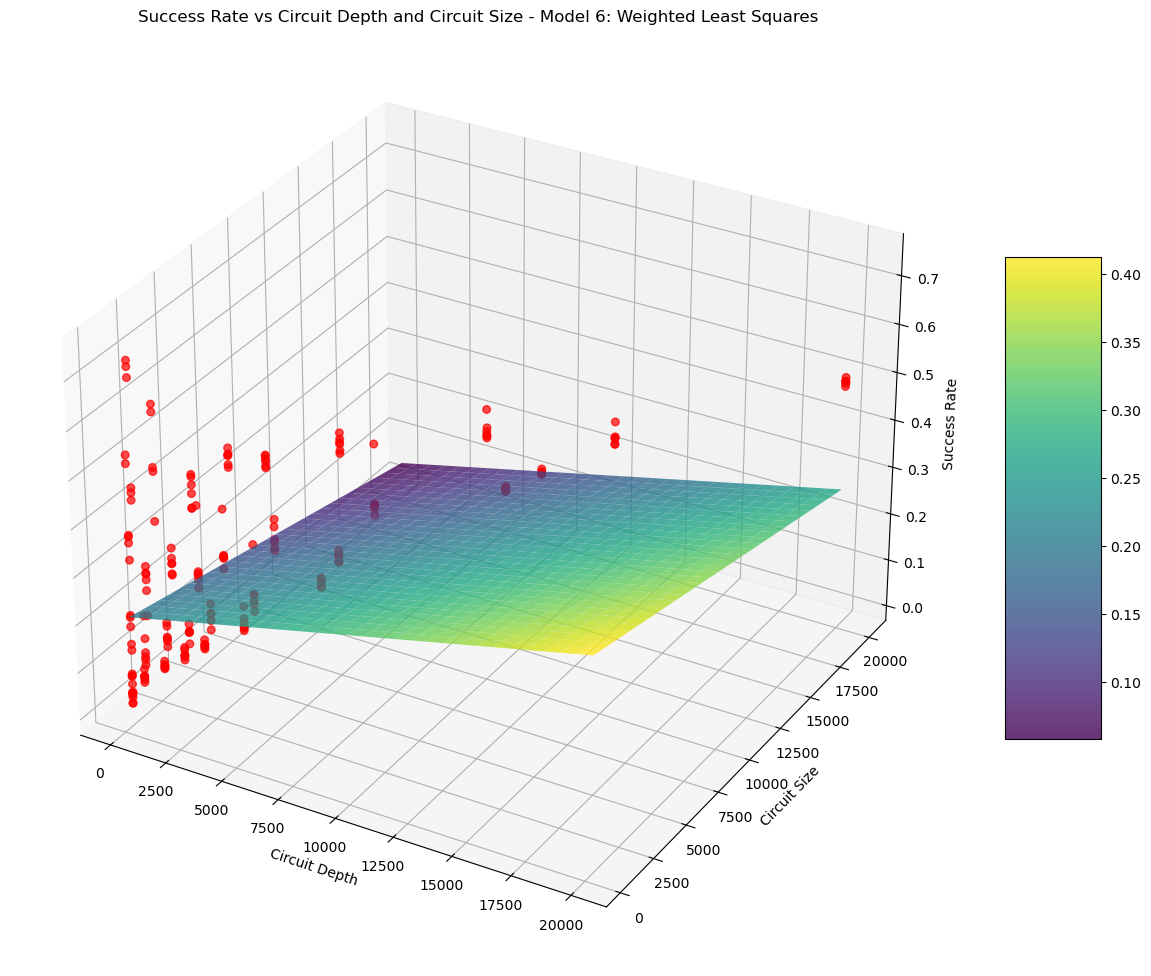

In [13]:
output_dir = 'regression_visualizations'
os.makedirs(output_dir, exist_ok=True)

# Load data
csv_file = 'consolidated_experiment_results.csv'
df = load_data(csv_file)

# Run analysis and create visualizations
log_model, wls_model = analyze_and_visualize_models(df, output_dir)

print("\nAnalysis completed.")

# Interpretation of Regression Analysis Results
## Homoscedasticity Analysis
In regression analysis, homoscedasticity is an important assumption indicating that the variance of residuals should be constant across all predicted values. To evaluate this assumption, we used the Breusch-Pagan and White tests.

### Results for Model 2 (Log-transformed):

Breusch-Pagan Test:
LM statistic: 14.3965
p-value: 0.0061 (< 0.05)

White Test:
LM statistic: 21.7724
p-value: 0.0096 (< 0.05)

### Results for Model 6 (Weighted Least Squares):
Breusch-Pagan Test:
LM statistic: 23.1170
p-value: 0.0001 (< 0.05)
White Test:
LM statistic: 45.0257
p-value: 0.0000 (< 0.05)

### Interpretation:
In the Breusch-Pagan test, the null hypothesis is that residuals have constant variance (homoscedasticity). A p-value less than 0.05 indicates that we reject this null hypothesis, suggesting the presence of heteroscedasticity.

Both models show evidence of heteroscedasticity according to the Breusch-Pagan and White tests, with p-values significantly below 0.05. This indicates that the variance of residuals is not constant across predicted values, which could affect the precision of standard errors and, consequently, statistical inference.
It's important to note that Model 2 already uses heteroscedasticity-robust standard errors (HC3), which mitigates this problem. Although Model 6 uses weights to attempt to correct for heteroscedasticity, the results suggest that this correction was not completely effective.

Despite the presence of heteroscedasticity, both models show high adjusted R² values (0.953 for Model 2 and 0.936 for Model 6), indicating a good overall fit to the data.

## Comparison of the Two Models

Looking at the overall results:

### Model 2 (Log-transformed) has:

Higher adjusted R² (0.953 vs 0.936)
Better Durbin-Watson statistic (1.845 vs 0.939)
Uses robust standard errors (HC3) to account for heteroscedasticity
Shows that circuit_width and payload_size are highly significant predictors (p < 0.001)
Circuit_depth and circuit_size are not statistically significant at α = 0.05

### Model 6 (Weighted Least Squares) has:
All predictors are statistically significant (p < 0.001)
Better AIC and BIC values (-565.0 vs -105.5)
Shows a positive effect of circuit_depth and circuit_width
Shows a negative effect of circuit_size and payload_size


## Recommendation
Based on these results, I recommend using Model 2 (Log-transformed) with robust standard errors for the following reasons:
It has the highest adjusted R² value (0.953)
It already accounts for heteroscedasticity through robust standard errors
The Durbin-Watson statistic is closer to 2, indicating less autocorrelation in residuals
The log transformation helps stabilize the variance and makes the relationship more interpretable
However, it's worth noting that Model 6 provides valuable insights as well, particularly in showing that all predictors are statistically significant. The fact that both models show evidence of heteroscedasticity suggests that the relationship between circuit parameters and success rates is complex and may benefit from more advanced modeling approaches in future work.
For your report, you can highlight that while both models show evidence of heteroscedasticity, Model 2 with robust standard errors provides the most reliable estimates of the relationships between circuit parameters and success rates.

## Model Equations

**Model 2 (Log-transformed):**

$$\log(\text{success\_rate} + 0.001) = 0.3464 - 7.4691 \times 10^{-6} \times \text{circuit\_depth} - 1.3186 \times 10^{-6} \times \text{circuit\_size} - 7.4778 \times 10^{-2} \times \text{circuit\_width} - 5.5700 \times 10^{-1} \times \text{payload\_size}$$

**Model 6 (Weighted Least Squares):**

$$\text{success\_rate} = 0.2467 + 1.0817 \times 10^{-5} \times \text{circuit\_depth} - 7.7292 \times 10^{-6} \times \text{circuit\_size} + 1.0180 \times 10^{-1} \times \text{circuit\_width} - 3.1909 \times 10^{-1} \times \text{payload\_size}$$

## Key Findings
* Payload size has the strongest negative effect on success rate in both models, indicating that larger quantum payloads significantly reduce success rates.
* Circuit width shows different effects in the two models: negative in Model 2 and positive in Model 6. This discrepancy may be due to the high correlation between circuit_width and payload_size.
* Circuit depth has a small negative effect in Model 2 (not statistically significant) but a small positive effect in Model 6 (statistically significant).
* Circuit size has a small negative effect in both models, but it's only statistically significant in Model 6.
* The presence of heteroscedasticity in both models suggests that the variability in success rates changes with different circuit configurations, which is an important consideration for quantum circuit design and optimization.